In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data is acquired from : https://www.mdpi.com/1999-4923/14/2/375#app1-pharmaceutics-14-00375

# Short Term Data (Training)

In [2]:
df_HPLC = pd.read_csv('Data/HPLC/Short Term.csv')
df_HMWP = pd.read_csv('Data/HMWP/Short Term.csv')

In [3]:
df_HPLC

,No,Time,Temperature,Prototype_Formulation,Packaging,Purity
0,1,0,5,1,1,98.0
1,2,13,5,1,1,98.0
2,3,33,5,1,1,98.1
3,4,46,5,1,1,97.4
4,5,60,5,1,1,97.6
...,...,...,...,...,...,...
175,176,13,40,3,2,96.0
176,177,33,40,3,2,92.2
177,178,46,40,3,2,90.0
178,179,60,40,3,2,87.8


In [4]:
df_HMWP

,No,Time,Temperature,Prototype_Formulation,Packaging,Purity
0,1,0,5,1,1,0.23
1,2,13,5,1,1,0.25
2,3,33,5,1,1,0.30
3,4,35,5,1,1,NaN
4,5,45,5,1,1,0.31
...,...,...,...,...,...,...
265,266,45,40,3,2,1.22
266,267,60,40,3,2,NaN
267,268,61,40,3,2,1.37
268,269,96,40,3,2,NaN


In [5]:
df_HPLC.drop(columns=['No'], inplace = True)
df_HMWP.drop(columns=['No'], inplace = True)

In [6]:
df_HPLC['Type'] = (df_HPLC['Prototype_Formulation'] ).astype(int).astype(str) + '-' + df_HPLC['Packaging'].astype(str)
df_HMWP['Type'] = (df_HMWP['Prototype_Formulation']).astype(int).astype(str) + '-' + df_HMWP['Packaging'].astype(str)

In [7]:
df_HPLC

,Time,Temperature,Prototype_Formulation,Packaging,Purity,Type
0,0,5,1,1,98.0,1-1
1,13,5,1,1,98.0,1-1
2,33,5,1,1,98.1,1-1
3,46,5,1,1,97.4,1-1
4,60,5,1,1,97.6,1-1
...,...,...,...,...,...,...
175,13,40,3,2,96.0,3-2
176,33,40,3,2,92.2,3-2
177,46,40,3,2,90.0,3-2
178,60,40,3,2,87.8,3-2


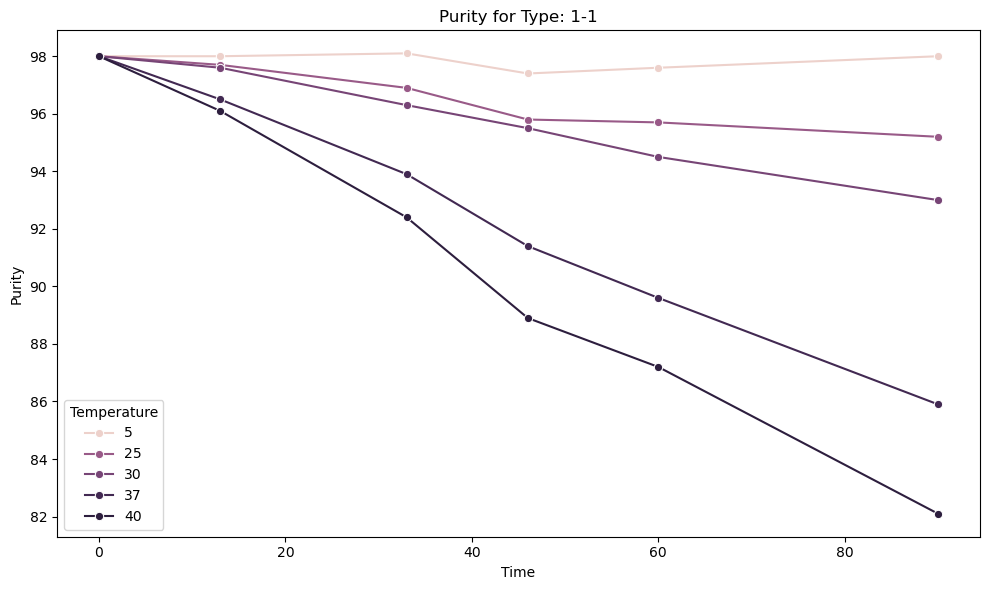

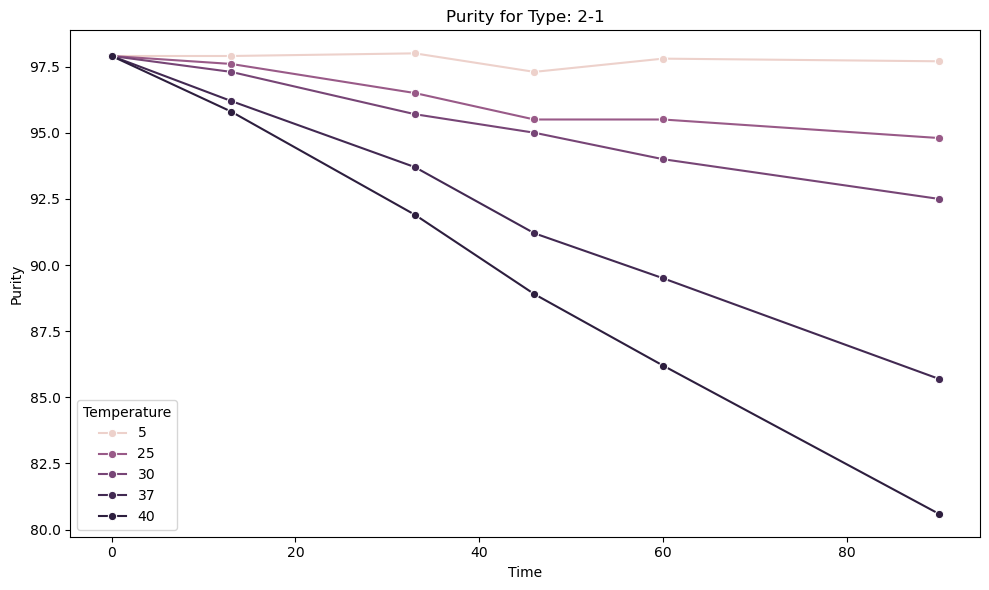

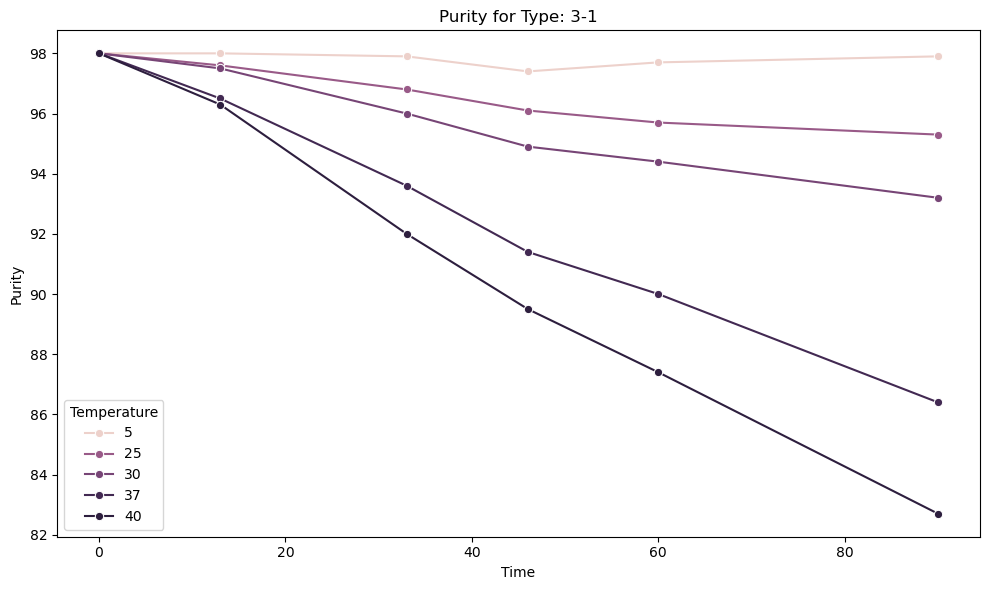

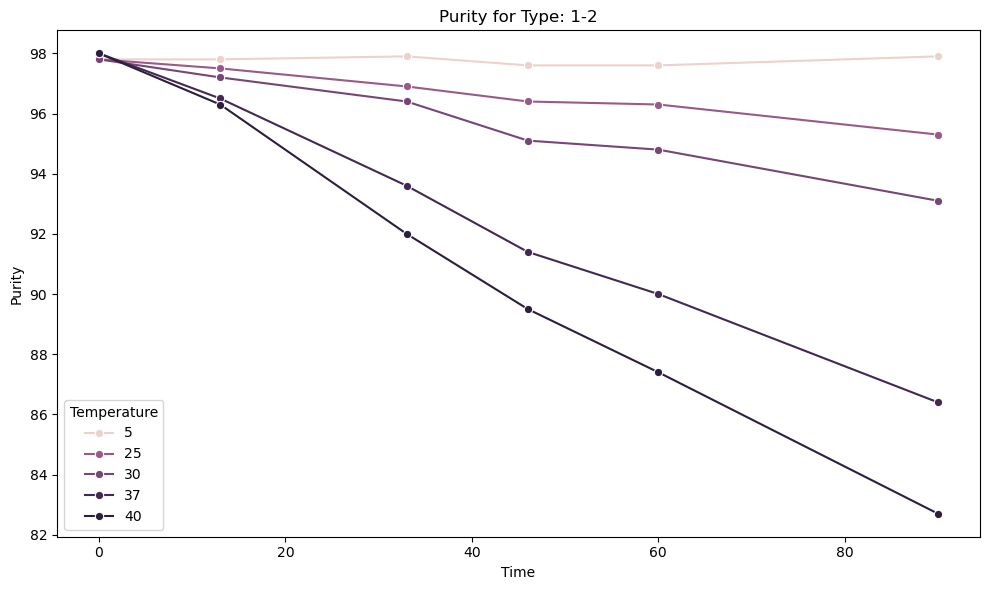

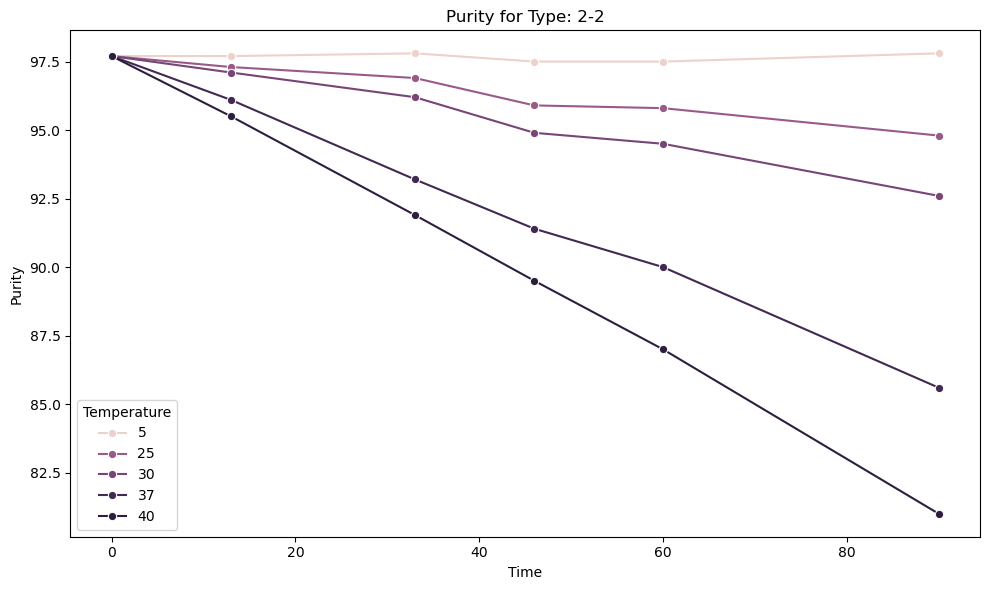

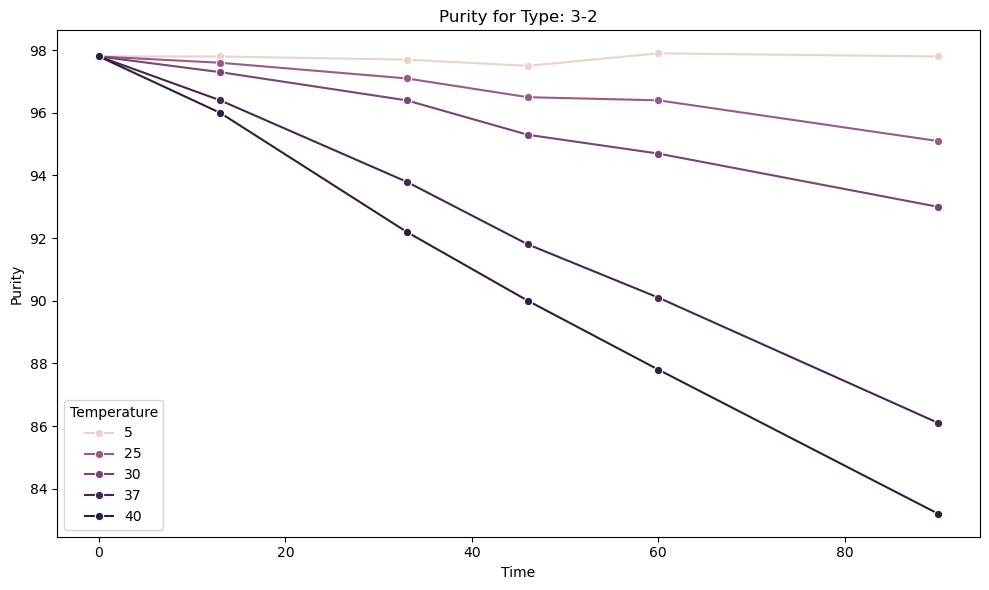

In [8]:
for i in df_HPLC['Type'].unique():
    df_sub = df_HPLC[df_HPLC['Type'] == i].copy()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_sub, x='Time', y='Purity', hue='Temperature', marker = 'o')
    plt.title(f'Purity for Type: {i}')
    plt.tight_layout()

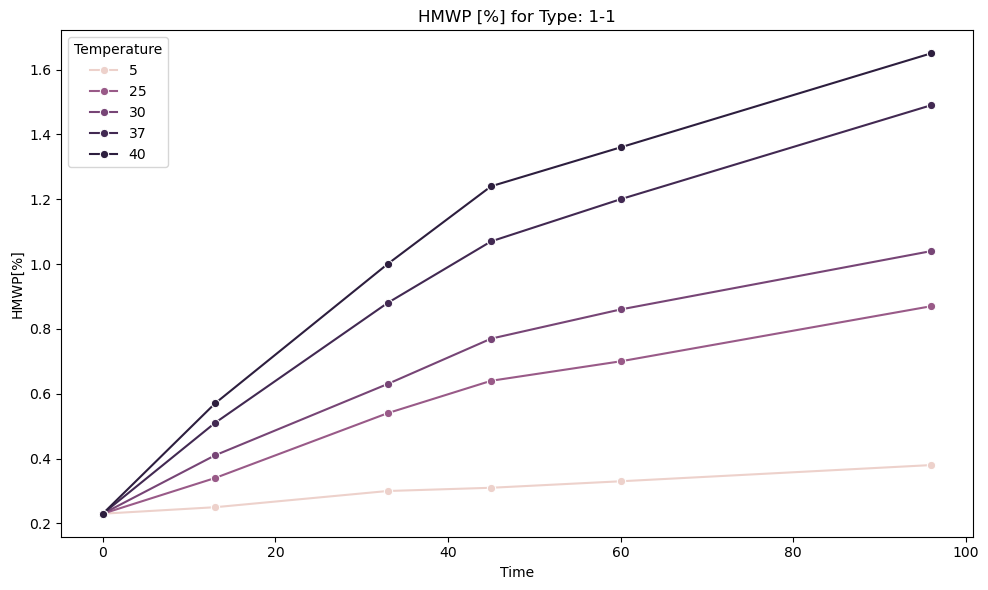

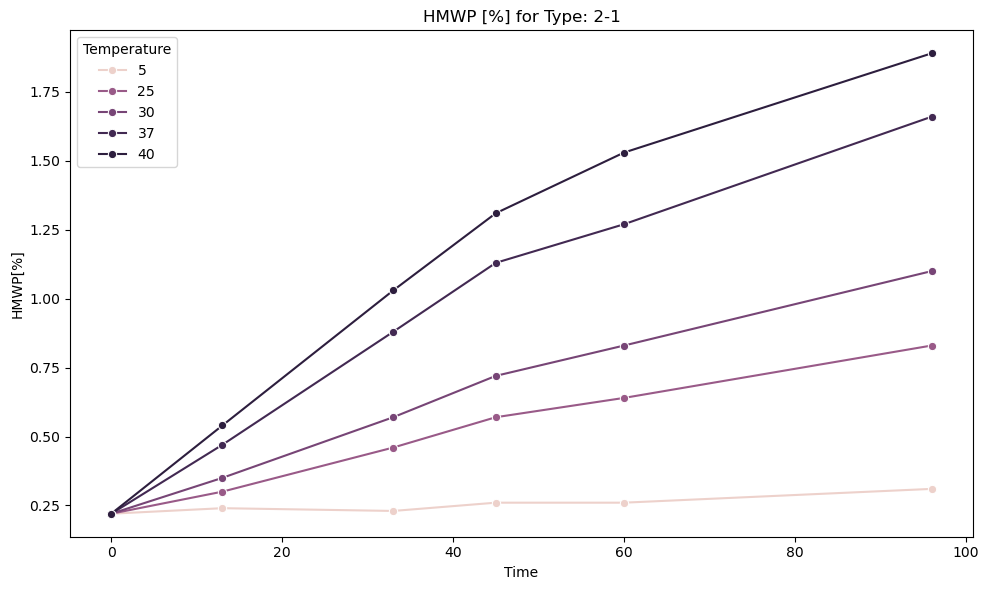

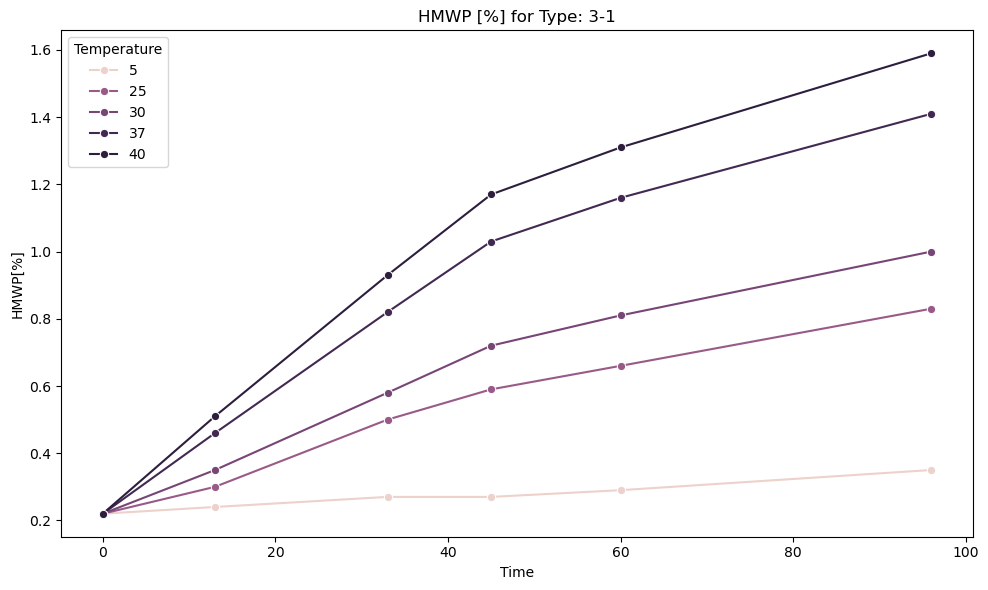

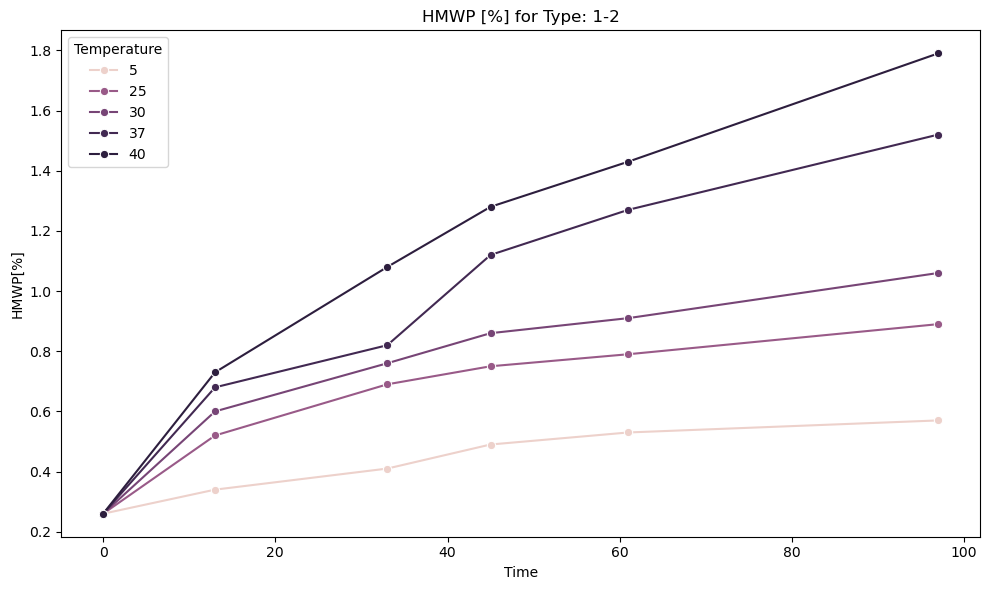

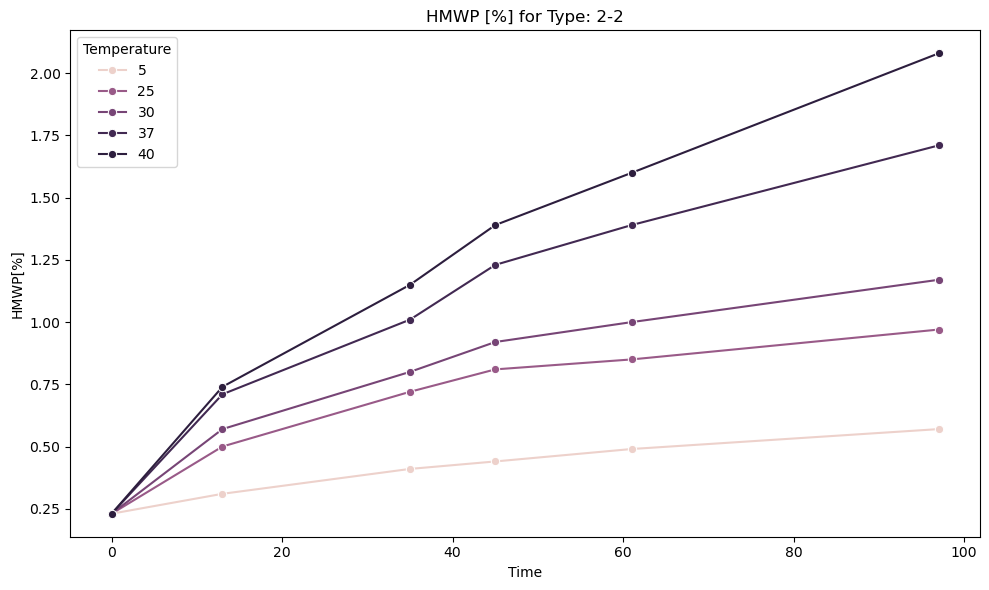

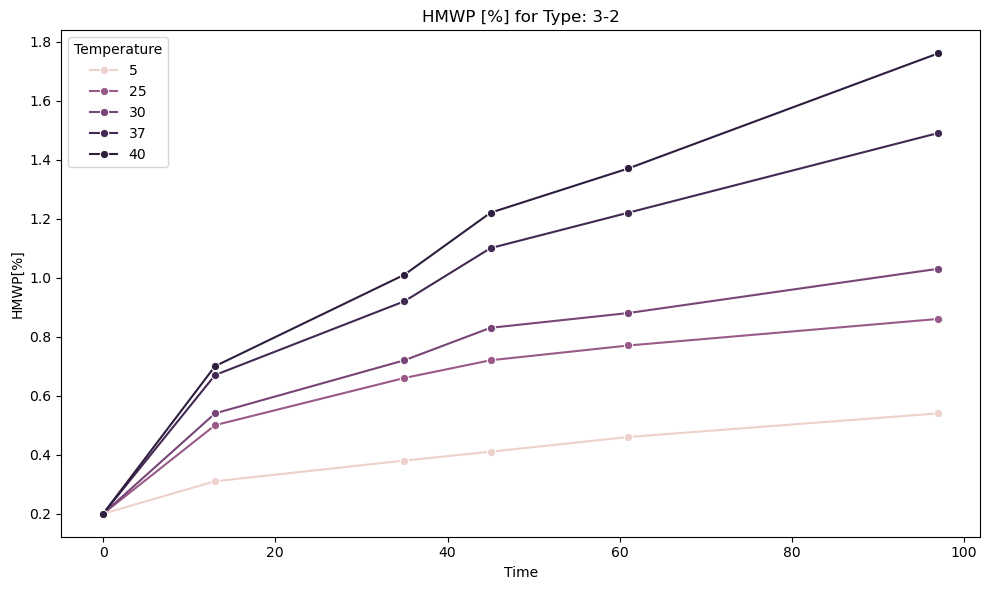

In [9]:
for i in df_HMWP['Type'].unique():
    df_sub = df_HMWP[df_HMWP['Type'] == i].copy()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_sub, x='Time', y='Purity', hue='Temperature', marker = 'o')
    plt.title(f'HMWP [%] for Type: {i}')
    plt.ylabel('HMWP[%]')
    plt.tight_layout()

# Long Term Data (Testing)

In [10]:
df_HPLC_L = pd.read_csv('Data/HPLC/Long Term.csv')
df_HMWP_L = pd.read_csv('Data/HMWP/Long Term.csv')

In [11]:
df_HPLC_L.drop(columns=['No'], inplace = True)
df_HMWP_L.drop(columns=['No'], inplace = True)

df_HPLC_L['Type'] = (df_HPLC_L['Prototype_Formulation'] ).astype(int).astype(str) + '-' + df_HPLC_L['Packaging'].astype(str)
df_HMWP_L['Type'] = (df_HMWP_L['Prototype_Formulation']).astype(int).astype(str) + '-' + df_HMWP_L['Packaging'].astype(str)

<Axes: xlabel='Time', ylabel='Purity'>

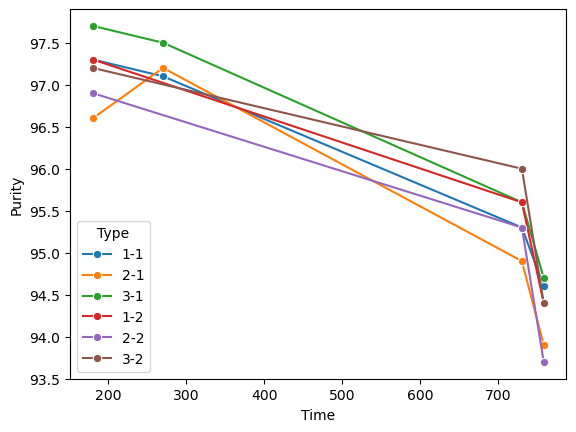

In [12]:
sns.lineplot(data=df_HPLC_L, x='Time', y='Purity', hue='Type', marker = 'o')

Text(0, 0.5, 'HMWP[%]')

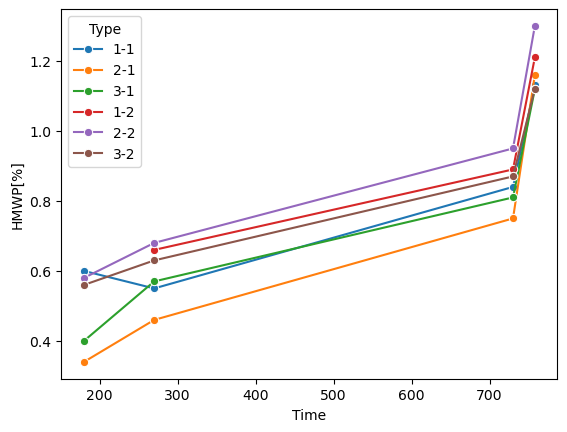

In [13]:
sns.lineplot(data=df_HMWP_L, x='Time', y='Purity', hue='Type', marker = 'o')
plt.ylabel("HMWP[%]")

So far, this data set is the most comprehensive. Even though it only uses around 1 month's worth of training, it provides different temperatures and testing values. Furthermore, the supporting material of this article also provides the trained parameters for validation